In [59]:
import numpy as np

import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/') 

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import imp
import cat_utils
imp.reload(cat_utils)

import cPickle as pickle

In [62]:
logjycuts_ir = [-5,-4,-3,-2,-1,0]
logjycuts_rad = [-1,-.5,0,.5,1]

def list2pairs(l):
    return [[l[j],l[j+1]] for j in range(len(l)-1)]

print(list2pairs(logjycuts_rad))

[[-1, -0.5], [-0.5, 0], [0, 0.5], [0.5, 1]]


In [63]:
d = '/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/'

w2_img_diff_flux_cuts_img_and_counts = [pickle.load(open(d+'w2_logjymin=%d_logjymax=%d.p'%(logjyminmax[0],logjyminmax[1]),'rb')) for logjyminmax in list2pairs(logjycuts_ir)]
w2_img_diff_flux_cuts = [l[0] for l in w2_img_diff_flux_cuts_img_and_counts]
w2_img_diff_flux_cuts_counts = [l[1] for l in w2_img_diff_flux_cuts_img_and_counts]

secat_img_diff_flux_cuts_img_and_counts = [pickle.load(open(d+'secat_logjymin=%d_logjymax=%d.p'%(logjyminmax[0],logjyminmax[1]),'rb')) for logjyminmax in list2pairs(logjycuts_ir)]
secat_img_diff_flux_cuts = [l[0] for l in secat_img_diff_flux_cuts_img_and_counts]
secat_img_diff_flux_cuts_counts = [l[1] for l in secat_img_diff_flux_cuts_img_and_counts]

mwa_img_bound_by_wise_diff_flux_cuts_img_and_counts = [pickle.load(open(d+'mwacat_bounded_by_wise_logjymin=%1.1f_logjymax=%1.1f.p'%(logjyminmax[0],logjyminmax[1]),'rb')) for logjyminmax in list2pairs(logjycuts_rad)]
mwa_img_bound_by_wise_diff_flux_cuts = [l[0] for l in mwa_img_bound_by_wise_diff_flux_cuts_img_and_counts]
mwa_img_bound_by_wise_diff_flux_cuts_counts = [l[1] for l in mwa_img_bound_by_wise_diff_flux_cuts_img_and_counts]

mwa_img_bound_by_secatfov_diff_flux_cuts_img_and_counts = [pickle.load(open(d+'mwacat_bounded_by_secatfov_logjymin=%1.1f_logjymax=%1.1f.p'%(logjyminmax[0],logjyminmax[1]),'rb')) for logjyminmax in list2pairs(logjycuts_rad)]
mwa_img_bound_by_secatfov_diff_flux_cuts = [l[0] for l in mwa_img_bound_by_secatfov_diff_flux_cuts_img_and_counts]
mwa_img_bound_by_secatfov_diff_flux_cuts_counts = [l[1] for l in mwa_img_bound_by_secatfov_diff_flux_cuts_img_and_counts]

In [64]:
def sum_images_in_list_between_indices(imglist,i0,i1):
    return np.sum(np.array(imglist[i0:i1]),axis=0)

In [65]:
mwaimg = sum_images_in_list_between_indices(mwa_img_bound_by_wise_diff_flux_cuts,0,2)
mwaimg -= mwaimg.mean()

wiseimg = sum_images_in_list_between_indices(w2_img_diff_flux_cuts,0,2)
wiseimg  -= wiseimg.mean()

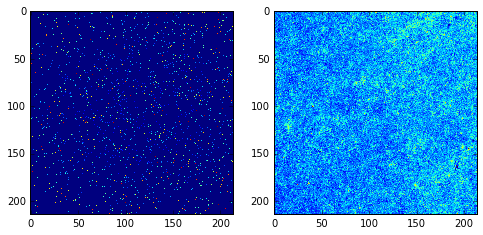

In [66]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(mwaimg,interpolation='nearest')
plt.subplot(122)
plt.imshow(wiseimg,interpolation='nearest')

In [67]:
c = np.mean(mwaimg*wiseimg)/(np.std(mwaimg)*np.std(wiseimg))
c_flip = np.mean(np.flipud(np.fliplr(mwaimg))*wiseimg)/(np.std(mwaimg)*np.std(wiseimg))

(c,c_flip)

(0.024102704170955933, -0.0057434918329211365)

In [68]:
def flip(m):
    return np.flipud(m)

n_fluxcuts_mwa = len(logjycuts_rad)-1
n_fluxcuts_ir = len(logjycuts_ir)-1

c_grid_mwa_wise = np.zeros((n_fluxcuts_mwa,n_fluxcuts_ir))
c_grid_mwa_secat = np.zeros((n_fluxcuts_mwa,n_fluxcuts_ir))

c_grid_mwa_wise_flip = np.zeros((n_fluxcuts_mwa,n_fluxcuts_ir))
c_grid_mwa_secat_flip = np.zeros((n_fluxcuts_mwa,n_fluxcuts_ir))

for mwai in range(n_fluxcuts_mwa):
    for iri in range(n_fluxcuts_ir):
        
        mwaimg = sum_images_in_list_between_indices(mwa_img_bound_by_wise_diff_flux_cuts,0,mwai+1)
        mwaimg -= mwaimg.mean()
        irimg = sum_images_in_list_between_indices(w2_img_diff_flux_cuts,0,iri+1)
        irimg  -= wiseimg.mean()
        
        c_grid_mwa_wise[mwai,iri] = np.mean(mwaimg*irimg)/(np.std(mwaimg)*np.std(irimg))
        c_grid_mwa_wise_flip[mwai,iri] = np.mean(flip(mwaimg)*irimg)/(np.std(mwaimg)*np.std(irimg))
        
        
        mwaimg = sum_images_in_list_between_indices(mwa_img_bound_by_secatfov_diff_flux_cuts,0,mwai+1)
        mwaimg -= mwaimg.mean()
        irimg = sum_images_in_list_between_indices(secat_img_diff_flux_cuts,0,iri+1)
        irimg  -= wiseimg.mean()
        
        c_grid_mwa_secat[mwai,iri] = np.mean(mwaimg*irimg)/(np.std(mwaimg)*np.std(irimg))
        c_grid_mwa_secat_flip[mwai,iri] = np.mean(flip(mwaimg)*irimg)/(np.std(mwaimg)*np.std(irimg))

In [69]:
c_grid_mwa_wise

array([[ 0.02865717,  0.0261313 ,  0.0029254 ,  0.00276173,  0.00250483],
       [ 0.03328408,  0.0241027 ,  0.00511682, -0.00333062, -0.00444665],
       [ 0.02426609,  0.01887985,  0.00096992,  0.00049615, -0.00182392],
       [ 0.02004107,  0.02195275,  0.00924771, -0.0008075 , -0.00117724]])

In [70]:
np.max(c_grid_mwa_wise),np.max(c_grid_mwa_secat)

(0.033284083238030678, 0.013995821958091148)

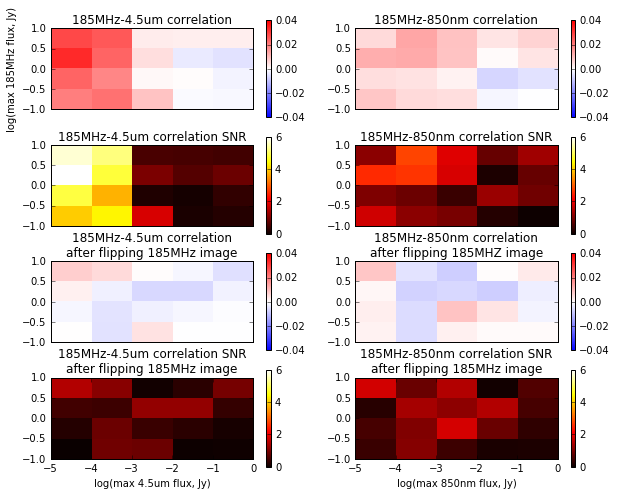

In [103]:
plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 10})
nrows,ncols = 4,2
cm = 'seismic'
v0,v1 = 0,.04
e = [min(logjycuts_ir),max(logjycuts_ir),min(logjycuts_rad),max(logjycuts_rad)]
cticks = [-.04,-.02,0,.02,.04]
snrticks = [0,2,4,6]

plt.subplot(nrows,ncols,1)
plt.imshow(c_grid_mwa_wise,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=e)
plt.colorbar(ticks=cticks)
plt.title('185MHz-4.5um correlation')
plt.ylabel('log(max 185MHz flux, Jy)')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,2)
plt.imshow(c_grid_mwa_secat,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=e)
plt.colorbar(ticks=cticks)
plt.title('185MHz-850nm correlation')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,3)
plt.imshow(np.abs(c_grid_mwa_wise)/(1./200),interpolation='nearest',vmin=0,vmax=max(snrticks),cmap='hot',extent=e)
plt.colorbar(ticks=snrticks)
plt.title('185MHz-4.5um correlation SNR')
#plt.ylabel('log(max 185MHz flux, Jy)')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,4)
plt.imshow(np.abs(c_grid_mwa_secat)/(1./200),interpolation='nearest',vmin=0,vmax=max(snrticks),cmap='hot',extent=e)
plt.colorbar(ticks=snrticks)
plt.title('185MHz-850nm correlation SNR')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,5)
plt.imshow(c_grid_mwa_wise_flip,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=e)
plt.colorbar(ticks=cticks)
plt.title('185MHz-4.5um correlation\nafter flipping 185MHz image')
#plt.ylabel('log(max 185MHz flux, Jy)')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,6)
plt.imshow(c_grid_mwa_secat_flip,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=e)
plt.colorbar(ticks=cticks)
plt.title('185MHz-850nm correlation\nafter flipping 185MHZ image')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,7)
plt.imshow(np.abs(c_grid_mwa_wise_flip)/(1./200),interpolation='nearest',vmin=0,vmax=max(snrticks),cmap='hot',extent=e)
plt.colorbar(ticks=snrticks)
plt.title('185MHz-4.5um correlation SNR\nafter flipping 185MHz image')
plt.xlabel('log(max 4.5um flux, Jy)')
#plt.ylabel('log(max 185MHz flux, Jy)')

plt.subplot(nrows,ncols,8)
plt.imshow(np.abs(c_grid_mwa_secat_flip)/(1./200),interpolation='nearest',vmin=0,vmax=max(snrticks),cmap='hot',extent=e)
plt.colorbar(ticks=snrticks)
plt.title('185MHz-850nm correlation SNR\nafter flipping 185MHz image')
plt.xlabel('log(max 850nm flux, Jy)')

plt.savefig('source_correlation_grids_and_snrs.pdf',bbox_inches='tight')

In [50]:
c_grid_mwa_wise[9,9],c_grid_mwa_secat[9,9]

(-0.00326761602353192, 0.0013063711440090039)

In [62]:
c_grid_mwa_wise[8,8],c_grid_mwa_secat[8,8]

(0.030800718736659089, 0.0085742664628352359)

In [63]:
c_grid_mwa_wise_flip[8,8],c_grid_mwa_secat_flip[8,8]

(-0.0019290478990405036, -0.00054915016952075864)

In [59]:
1./200

0.005

/Users/abrahamn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/Users/abrahamn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/abrahamn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10


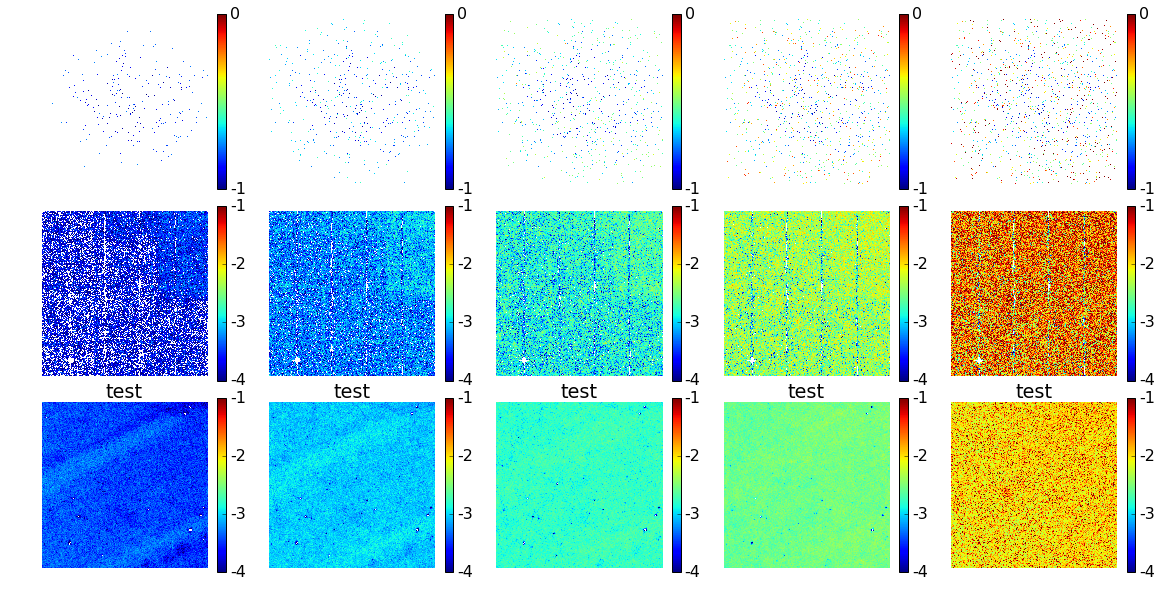

In [203]:
plt.figure(figsize=(20,10))
inds = [2,4,6,8,10]
for i in range(len(inds)):
    img = sum_images_in_list_between_indices(mwa_img_bound_by_wise_diff_flux_cuts,0,inds[i])
    plt.subplot(3,len(inds),i+1)
    v0,v1 = -1,0
    plt.imshow(np.log10(img),interpolation='nearest',vmin=v0,vmax=v1)
    cbar=plt.colorbar(format='%d')
    cbar.set_ticks(np.arange(v0,v1+1))
    cbar.set_ticklabels(np.arange(v0,v1+1))
    plt.axis('off')
    plt.title('MWA 0- %')
    
for i in range(len(inds)):
    img = sum_images_in_list_between_indices(secat_img_diff_flux_cuts,0,inds[i])
    plt.subplot(3,len(inds),len(inds)+i+1)
    v0,v1 = -4,-1
    plt.imshow(np.log10(img),interpolation='nearest',vmin=v0,vmax=v1)
    cbar=plt.colorbar(format='%d')
    cbar.set_ticks(np.arange(v0,v1+1))
    cbar.set_ticklabels(np.arange(v0,v1+1))
    plt.axis('off')
    plt.title('')

for i in range(len(inds)):
    img = sum_images_in_list_between_indices(w2_img_diff_flux_cuts,0,inds[i])
    plt.subplot(3,len(inds),2*len(inds)+i+1)
    v0,v1 = -4,-1
    plt.imshow(np.log10(img),interpolation='nearest',vmin=v0,vmax=v1)
    cbar=plt.colorbar(format='%d')
    cbar.set_ticks(np.arange(v0,v1+1))
    cbar.set_ticklabels(np.arange(v0,v1+1))
    plt.axis('off')
    plt.title('test')

what about in janskies? or magnitudes?
     
#plt.tight_layout()
plt.subplots_adjust(hspace = .1)
plt.subplots_adjust(wspace = .1)